# Machine Learning - Insurance Fraud

### Applying Models

Will be looking to Apply 7 different models + baseline
   
   1. Logistic regression 
   2. KNN 
   3. Decision 
   4. Random Forest
   5. SVC
   6. XGBoost
   7. Stacking 
   - They will all be supported with GridSearch to find best parameters 
   
   - Best Scores will be compared. 
   
#### SMOTE 
   - To make the imbalance in minority class "fraud" equal to "not fruad" 
   - Making the training sample 50/50 Fraud
    
Will be applying 3 Models: 
   
   1. Logistic Regression 
   2. XGBoost 
   3. Decision Tree 

In [1]:
#Install Plotly 
!pip install plotly

In [2]:
#Install xgboost
!pip install xgboost

In [3]:
#Package imports 
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import plotly.express as px
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 

#Sklearn Packs
from sklearn.model_selection import train_test_split    #Splitting Data 

from sklearn.dummy import DummyClassifier          #Baseline Model 

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.inspection import permutation_importance
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression

from xgboost import XGBClassifier
from xgboost import plot_importance

from imblearn.over_sampling import SMOTE

from mlxtend.classifier import StackingClassifier

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve

import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

## Import Data

In [4]:
#Import Data link
X_feat = '/Users/Neil/Desktop/X.Feat.csv'
y_target = '/Users/Neil/Desktop/y.Target 8.09.49 PM.csv'

In [5]:
#Load data
X =  pd.read_csv(X_feat)
y = pd.read_csv(y_target)

In [6]:
#check prep data
X.head()

Unnamed: 0  months_as_customer  policy_deductable  umbrella_limit  \
0           0                 328               1000               0   
1           1                 228               2000         5000000   
2           2                 134               2000         5000000   
3           3                 256               2000         6000000   
4           4                 228               1000         6000000   

   capital-gains  capital-loss  incident_hour_of_the_day  \
0          53300             0                         5   
1              0             0                         8   
2          35100             0                         7   
3          48900        -62400                         5   
4          66000        -46000                        20   

   number_of_vehicles_involved  bodily_injuries  witnesses  ...  \
0                            1                1          2  ...   
1                            1                0          0  ...   
2                            3                2          3  ...   
3                            1                1          2  ...   
4                            1                0          1  ...   

   auto_model_Pathfinder  auto_model_RAM  auto_model_RSX  \
0                      0               0               0   
1                      0               0               0   
2                      0               1               0   
3                      0               0               0   
4                      0               0               1   

   auto_model_Silverado  auto_model_TL  auto_model_Tahoe  auto_model_Ultima  \
0                     0              0                 0                  0   
1                     0              0                 0                  0   
2                     0              0                 0                  0   
3                     0              0                 1                  0   
4                     0              0                 0                  0   

   auto_model_Wrangler  auto_model_X5  auto_model_X6  
0                    0              0              0  
1                    0              0              0  
2                    0              0              0  
3                    0              0              0  
4                    0              0              0  

[5 rows x 111 columns]

In [7]:
#check data
y.head()

Y
0  1
1  1
2  0
3  1
4  0

In [8]:
#Check shape
print(X.shape)
print(y.shape)

(1000, 111)
(1000, 1)


### Split data Train test

 - scaled data as X y 

In [9]:
# Target and Feature
X = X
y = y

In [10]:
#Train Test Split 75 - 25 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =51)

In [11]:
#Shape of split 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(750, 111)
(750, 1)
(250, 111)
(250, 1)


### Load in Visual Tool 
 - ROC Curve 
 - Confusion Matrix
 - Precision/Recall

In [12]:
def show_summary_report(actual, prediction):

    if isinstance(actual, pd.Series):
        actual = actual.values.astype(int)
    prediction = prediction.astype(float)
    prediction_int = prediction.astype(int)

    print('Accuracy : %.4f [TP / N]         Best: 1, Worst: 0' %
          accuracy_score(actual, prediction_int))
    msg = '           Proportion of predicted labels that match the true labels.'
    print(msg)
    print('Precision: %.4f [TP / (TP + FP)] Best: 1, Worst: 0' %
          precision_score(actual, prediction_int))
    msg = '           Not to label a negative sample as positive.'
    print(msg)
    print('Recall   : %.4f [TP / (TP + FN)] Best: 1, Worst: 0' %
          recall_score(actual, prediction_int))
    msg = '           Find all the positive samples.'
    print(msg)
    print('ROC AUC  : %.4f                  Best: 1, Worst: < 0.5' %
          roc_auc_score(actual, prediction))
    print('-' * 80)
    print('TP: True Positives, FP: False Positives,')
    print('TN: True Negatives, FN: False Negatives,')
    print('N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction_int)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)

    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, prediction)
    roc_auc = auc(fpr, tpr)

    # plot
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    fig.subplots_adjust(left=0.02, right=0.98, wspace=0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square=True, annot=True, fmt='d',
                cbar=False, cmap='Blues', ax=ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')

    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color='b', alpha=0.2, where='post')
    ax[1].fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color='darkorange', lw=2,
               label='ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc='lower right')

    plt.show()

## Dummy Classifier - Baseline Model

 - What is the baseline if everything was predicted not fraud

Accuracy is:  0.753
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       753
           1       0.00      0.00      0.00       247

    accuracy                           0.75      1000
   macro avg       0.38      0.50      0.43      1000
weighted avg       0.57      0.75      0.65      1000

Accuracy : 0.7530 [TP / N]         Best: 1, Worst: 0
           Proportion of predicted labels that match the true labels.
Precision: 0.0000 [TP / (TP + FP)] Best: 1, Worst: 0
           Not to label a negative sample as positive.
Recall   : 0.0000 [TP / (TP + FN)] Best: 1, Worst: 0
           Find all the positive samples.
ROC AUC  : 0.5000                  Best: 1, Worst: < 0.5
--------------------------------------------------------------------------------
TP: True Positives, FP: False Positives,
TN: True Negatives, FN: False Negatives,
N: Number of samples


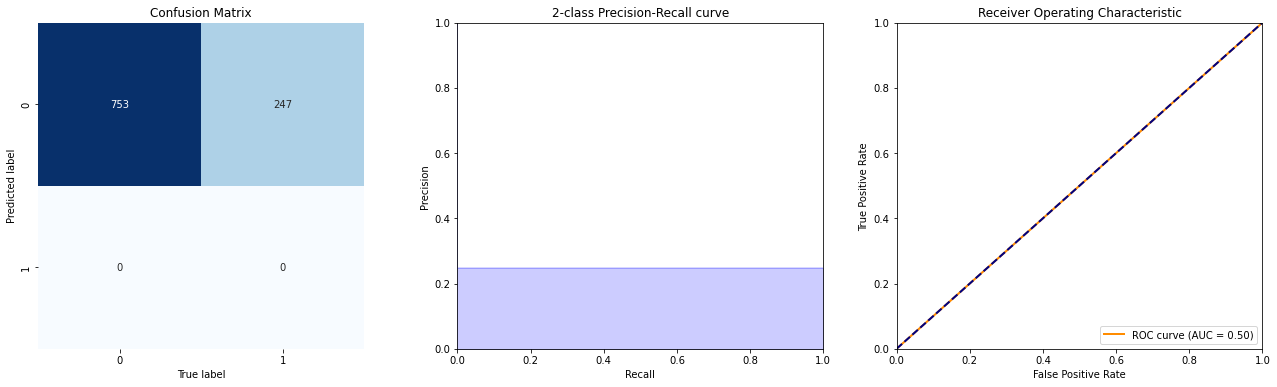

In [13]:
#Apply Dummy Classifier
dum_model = DummyClassifier(strategy="most_frequent")
dum_model.fit(X, y)

y_pred = dum_model.predict(X)
ac_dlog = accuracy_score(y,y_pred)
print('Accuracy is: ',ac_dlog)

print(classification_report(y, y_pred))

show_summary_report(y, y_pred)

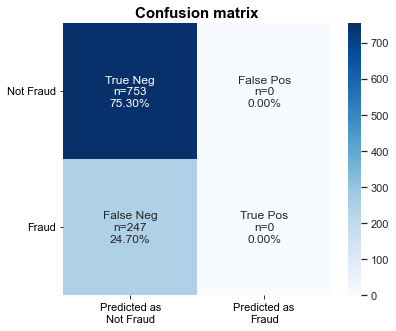

In [14]:
# Conf matrix - Visualised
cf_matrix = confusion_matrix(y, y_pred)

#labels for the inside of heatmap
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['n={0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

#put them next line
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

#in array 2,2 cos the heatmap will be 2,2
labels = np.asarray(labels).reshape(2,2)

#class labeling
yticklabels=['Not Fraud','Fraud']
xticklabels=['Predicted as\nNot Fraud','Predicted as\nFraud']


# Set the default matplotlib figure size to 7x7:
fix, ax = plt.subplots(figsize=(6,5))

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
sns.set()
ax = sns.heatmap(cf_matrix, annot=labels, 
            xticklabels = xticklabels, yticklabels = yticklabels, 
            fmt='', cmap='Blues');

# Resize the labels.
ax.set_title('Confusion matrix', fontsize=15,  fontweight='bold')
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=11, ha= 'center', rotation=0 )
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=11, va="center", rotation=0);

## Logistic Regression

In [15]:
#Logistic Regression apply model
lin_model = LogisticRegression()

# Train model 
lin_model.fit(X_train, y_train)
#Print Training Score 
print('Training Model Score: ',lin_model.score(X_train, y_train))

# Test The Model
y_pred = lin_model.predict(X_test)
ac_log = accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac_log)

# Print Report
print(classification_report(y_test, y_pred))

Training Model Score:  0.748
Accuracy is:  0.76
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       189
           1       1.00      0.02      0.03        61

    accuracy                           0.76       250
   macro avg       0.88      0.51      0.45       250
weighted avg       0.82      0.76      0.66       250



Accuracy : 0.7600 [TP / N]         Best: 1, Worst: 0
           Proportion of predicted labels that match the true labels.
Precision: 1.0000 [TP / (TP + FP)] Best: 1, Worst: 0
           Not to label a negative sample as positive.
Recall   : 0.0164 [TP / (TP + FN)] Best: 1, Worst: 0
           Find all the positive samples.
ROC AUC  : 0.5082                  Best: 1, Worst: < 0.5
--------------------------------------------------------------------------------
TP: True Positives, FP: False Positives,
TN: True Negatives, FN: False Negatives,
N: Number of samples


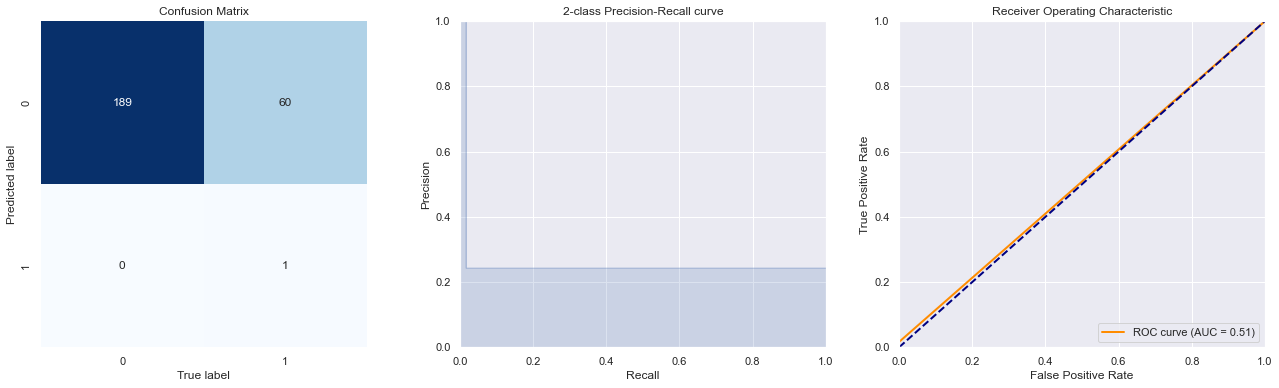

In [16]:
#Show Report
show_summary_report(y_test, y_pred)

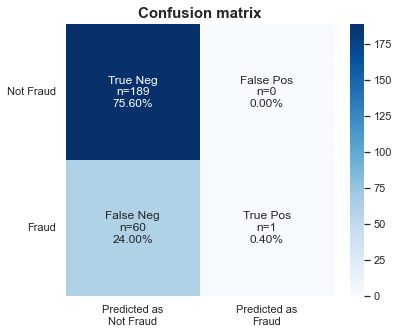

In [17]:
# Conf matrix
cf_matrix = confusion_matrix(y_test, y_pred)

#labels for the inside of heatmap
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['n={0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

#put them next line
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

#in array 2,2 cos the heatmap will be 2,2
labels = np.asarray(labels).reshape(2,2)

#class labeling
yticklabels=['Not Fraud','Fraud']
xticklabels=['Predicted as\nNot Fraud','Predicted as\nFraud']


# Set the default matplotlib figure size to 7x7:
fix, ax = plt.subplots(figsize=(6,5))

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
sns.set()
ax = sns.heatmap(cf_matrix, annot=labels, 
            xticklabels = xticklabels, yticklabels = yticklabels, 
            fmt='', cmap='Blues');

# Resize the labels.
ax.set_title('Confusion matrix', fontsize=15,  fontweight='bold')
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=11, ha= 'center', rotation=0 )
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=11, va="center", rotation=0);

### Logistic regression - Gridsearch

In [18]:
#prepare grid search
clf = LogisticRegression()
grid_values = {'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],'penalty': ['l1', 'l2','elasticnet','none'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'recall')
grid_clf_acc.fit(X_train, y_train)
log_b = grid_clf_acc.best_estimator_
log_b

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [19]:
#Grid Search for Logistic Regression
lin_modelf = LogisticRegression(C=1,penalty='l1', solver='liblinear')
#Train model
lin_modelf.fit(X_train, y_train)
#Print Training Score
print('Training Model Score: ',lin_modelf.score(X_train, y_train))

y_pred = lin_modelf.predict(X_test)
ac_logf = accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac_logf)

print(classification_report(y_test, y_pred))

Training Model Score:  0.8706666666666667
Accuracy is:  0.844
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       189
           1       0.72      0.59      0.65        61

    accuracy                           0.84       250
   macro avg       0.80      0.76      0.77       250
weighted avg       0.84      0.84      0.84       250



Accuracy : 0.8440 [TP / N]         Best: 1, Worst: 0
           Proportion of predicted labels that match the true labels.
Precision: 0.7200 [TP / (TP + FP)] Best: 1, Worst: 0
           Not to label a negative sample as positive.
Recall   : 0.5902 [TP / (TP + FN)] Best: 1, Worst: 0
           Find all the positive samples.
ROC AUC  : 0.7580                  Best: 1, Worst: < 0.5
--------------------------------------------------------------------------------
TP: True Positives, FP: False Positives,
TN: True Negatives, FN: False Negatives,
N: Number of samples


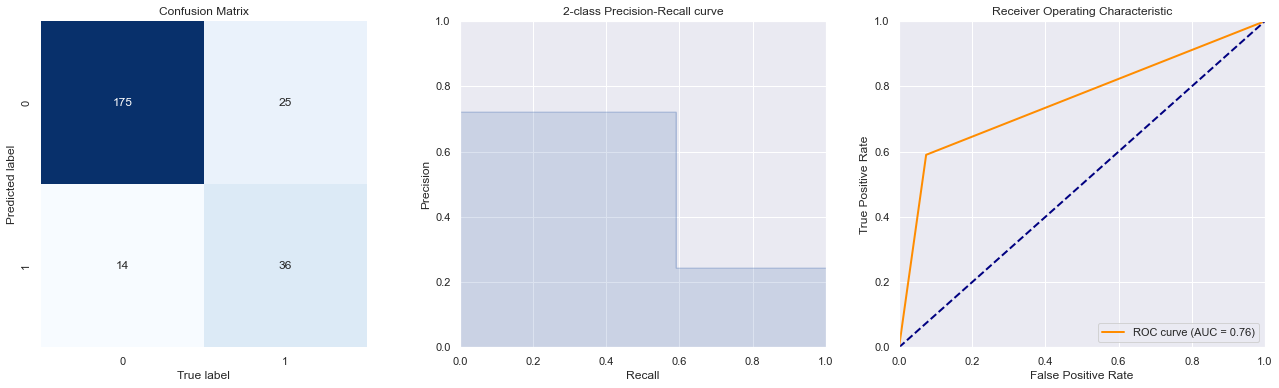

In [20]:
#Show report 
show_summary_report(y_test, y_pred)

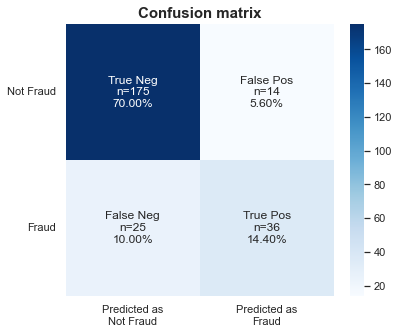

In [21]:
# Conf matrix
cf_matrix = confusion_matrix(y_test, y_pred)

#labels for the inside of heatmap
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['n={0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

#put them next line
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

#in array 2,2 cos the heatmap will be 2,2
labels = np.asarray(labels).reshape(2,2)

#class labeling
yticklabels=['Not Fraud','Fraud']
xticklabels=['Predicted as\nNot Fraud','Predicted as\nFraud']


# Set the default matplotlib figure size to 7x7:
fix, ax = plt.subplots(figsize=(6,5))

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
sns.set()
ax = sns.heatmap(cf_matrix, annot=labels, 
            xticklabels = xticklabels, yticklabels = yticklabels, 
            fmt='', cmap='Blues');

# Resize the labels.
ax.set_title('Confusion matrix', fontsize=15,  fontweight='bold')
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=11, ha= 'center', rotation=0 )
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=11, va="center", rotation=0);

## KNN 

In [22]:
# KNN Classifier - apply model
knn = KNeighborsClassifier()

#Train Model
knn.fit(X_train, y_train)
#Training score
print('Training Model Score: ',knn.score(X_train, y_train))

#Show testing results
y_pred = knn.predict(X_test)
ac_knn = accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac_knn)

print(classification_report(y_test, y_pred))

Training Model Score:  0.7853333333333333
Accuracy is:  0.712
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       189
           1       0.26      0.10      0.14        61

    accuracy                           0.71       250
   macro avg       0.51      0.50      0.48       250
weighted avg       0.64      0.71      0.66       250



### Grid search KNN 

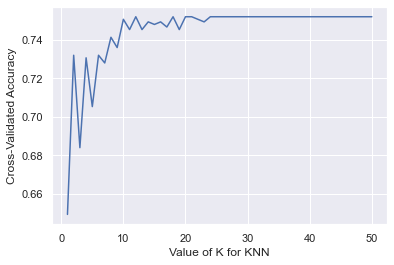

0.7520000000000001
{'n_neighbors': 18}
KNeighborsClassifier(n_neighbors=18)


In [23]:
# Apply Grid Search 
k_range = list(range(1, 51))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(X_train, y_train)

grid_mean_scores = grid.cv_results_['mean_test_score']
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

In [24]:
# Run Best Estimator
knn_f = KNeighborsClassifier(n_neighbors=18)
#Train model 
knn_f.fit(X_train, y_train)
#show training scores
print('Training Model Score: ',knn_f.score(X_train, y_train))

y_pred = knn_f.predict(X_test)
ac_knn_f = accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac_knn_f)

print(classification_report(y_test, y_pred))

Training Model Score:  0.756
Accuracy is:  0.744
              precision    recall  f1-score   support

           0       0.76      0.98      0.85       189
           1       0.20      0.02      0.03        61

    accuracy                           0.74       250
   macro avg       0.48      0.50      0.44       250
weighted avg       0.62      0.74      0.65       250



Accuracy : 0.7440 [TP / N]         Best: 1, Worst: 0
           Proportion of predicted labels that match the true labels.
Precision: 0.2000 [TP / (TP + FP)] Best: 1, Worst: 0
           Not to label a negative sample as positive.
Recall   : 0.0164 [TP / (TP + FN)] Best: 1, Worst: 0
           Find all the positive samples.
ROC AUC  : 0.4976                  Best: 1, Worst: < 0.5
--------------------------------------------------------------------------------
TP: True Positives, FP: False Positives,
TN: True Negatives, FN: False Negatives,
N: Number of samples


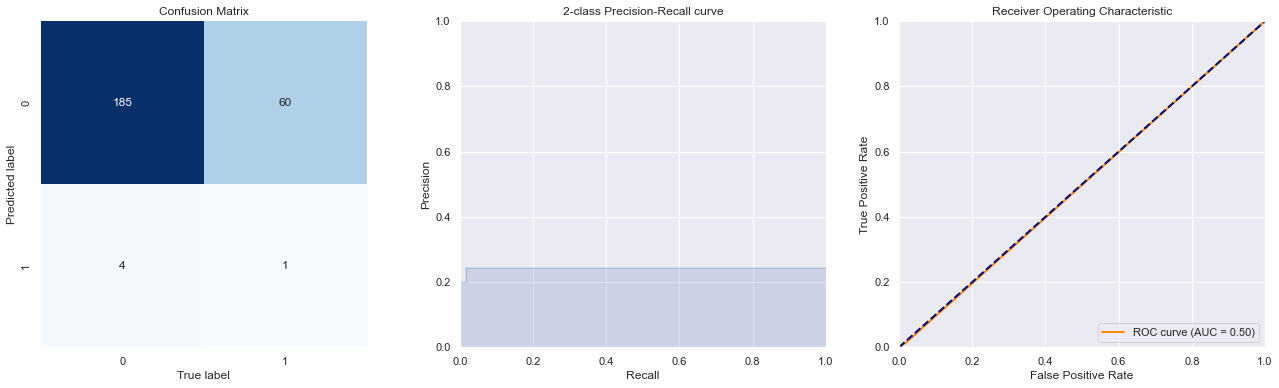

In [25]:
#Show Grid search report 
show_summary_report(y_test, y_pred)

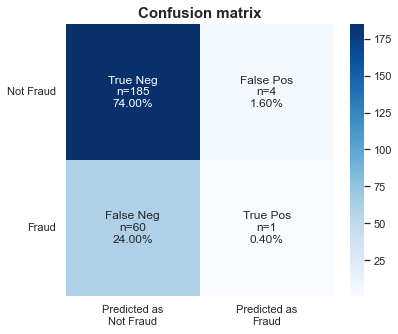

In [26]:
# Conf matrix
cf_matrix = confusion_matrix(y_test, y_pred)

#labels for the inside of heatmap
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['n={0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

#put them next line
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

#in array 2,2 cos the heatmap will be 2,2
labels = np.asarray(labels).reshape(2,2)

#class labeling
yticklabels=['Not Fraud','Fraud']
xticklabels=['Predicted as\nNot Fraud','Predicted as\nFraud']


# Set the default matplotlib figure size to 7x7:
fix, ax = plt.subplots(figsize=(6,5))

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
sns.set()
ax = sns.heatmap(cf_matrix, annot=labels, 
            xticklabels = xticklabels, yticklabels = yticklabels, 
            fmt='', cmap='Blues');

# Resize the labels.
ax.set_title('Confusion matrix', fontsize=15,  fontweight='bold')
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=11, ha= 'center', rotation=0 )
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=11, va="center", rotation=0);

## Decision Tree

In [27]:
#Create a Decision Tree Classifier
model_dt = DecisionTreeClassifier()

# Train the model using the training sets 
model_dt.fit(X_train, y_train)
#Show Trianing Scores 
print('Training Model Score: ',model_dt.score(X_train, y_train))

#Predict Score 
y_pred = model_dt.predict(X_test)
ac_dt = accuracy_score(y_test, y_pred)
print('Accuracy is: ',ac_dt)

print(classification_report(y_test, y_pred))

Training Model Score:  1.0
Accuracy is:  0.808
              precision    recall  f1-score   support

           0       0.85      0.90      0.88       189
           1       0.63      0.51      0.56        61

    accuracy                           0.81       250
   macro avg       0.74      0.71      0.72       250
weighted avg       0.80      0.81      0.80       250



### Grid search for decision tree 

In [28]:
#Set up grid search 
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : range(1,20),
              'criterion' :['gini', 'entropy']
             }

grid_search = GridSearchCV(estimator=model_dt, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, y_train)

final_model = grid_search.best_estimator_
final_model

Fitting 5 folds for each of 342 candidates, totalling 1710 fits


DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=13,
                       max_features='auto')

In [29]:
# Train the model using the training sets 
f_model = DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=17,
                       max_features='auto')
#Train the model 
f_model.fit(X_train, y_train)
#show training score 
print('Training Model Score: ',f_model.score(X_train, y_train))

#Predict Score 
y_pred_f = f_model.predict(X_test)
ac_dt_f = accuracy_score(y_test, y_pred_f)
print('Accuracy is: ',ac_dt_f)

print(classification_report(y_test, y_pred_f))

Training Model Score:  0.7693333333333333
Accuracy is:  0.76
              precision    recall  f1-score   support

           0       0.76      0.99      0.86       189
           1       0.67      0.03      0.06        61

    accuracy                           0.76       250
   macro avg       0.71      0.51      0.46       250
weighted avg       0.74      0.76      0.67       250



Accuracy : 0.7600 [TP / N]         Best: 1, Worst: 0
           Proportion of predicted labels that match the true labels.
Precision: 0.6667 [TP / (TP + FP)] Best: 1, Worst: 0
           Not to label a negative sample as positive.
Recall   : 0.0328 [TP / (TP + FN)] Best: 1, Worst: 0
           Find all the positive samples.
ROC AUC  : 0.5137                  Best: 1, Worst: < 0.5
--------------------------------------------------------------------------------
TP: True Positives, FP: False Positives,
TN: True Negatives, FN: False Negatives,
N: Number of samples


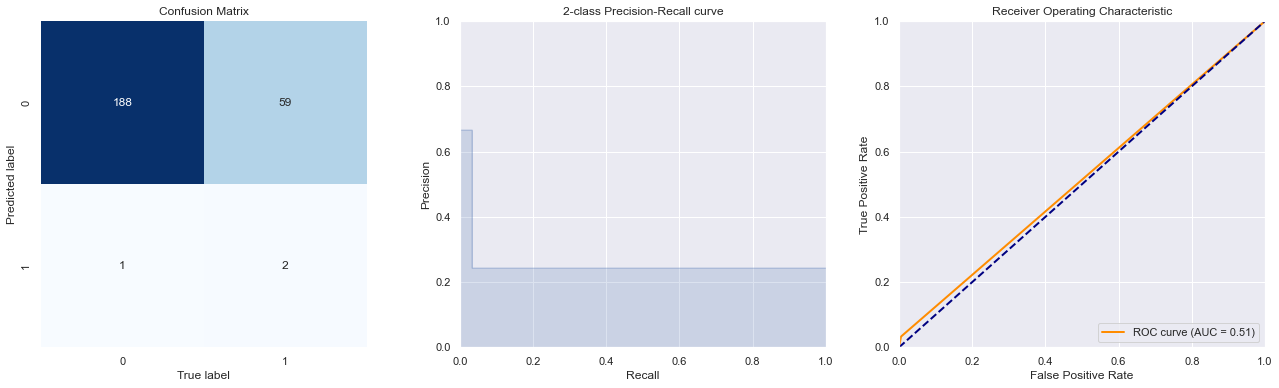

In [30]:
#Show report for Grid search
show_summary_report(y_test, y_pred_f)

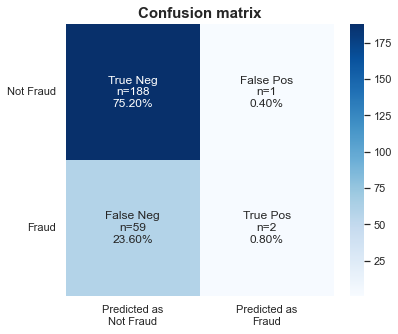

In [31]:
# Conf matrix
cf_matrix = confusion_matrix(y_test, y_pred_f)

#labels for the inside of heatmap
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['n={0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

#put them next line
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

#in array 2,2 cos the heatmap will be 2,2
labels = np.asarray(labels).reshape(2,2)

#class labeling
yticklabels=['Not Fraud','Fraud']
xticklabels=['Predicted as\nNot Fraud','Predicted as\nFraud']


# Set the default matplotlib figure size to 7x7:
fix, ax = plt.subplots(figsize=(6,5))

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
sns.set()
ax = sns.heatmap(cf_matrix, annot=labels, 
            xticklabels = xticklabels, yticklabels = yticklabels, 
            fmt='', cmap='Blues');

# Resize the labels.
ax.set_title('Confusion matrix', fontsize=15,  fontweight='bold')
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=11, ha= 'center', rotation=0 )
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=11, va="center", rotation=0);

## Random Forrest

In [32]:
#Create a Random Forest Classifier
model_rf = RandomForestClassifier()

# Train the model using the training sets 
model_rf.fit(X_train, y_train)
# Show train score
print('Training Model Score: ',model_rf.score(X_train, y_train))

#Predict Score 
y_pred = model_rf.predict(X_test)
ac_rf = accuracy_score(y_test, y_pred)
print('Accuracy is: ',ac_rf)

print(classification_report(y_test, y_pred))

Training Model Score:  1.0
Accuracy is:  0.784
              precision    recall  f1-score   support

           0       0.78      0.99      0.87       189
           1       0.89      0.13      0.23        61

    accuracy                           0.78       250
   macro avg       0.83      0.56      0.55       250
weighted avg       0.81      0.78      0.72       250



Accuracy : 0.7840 [TP / N]         Best: 1, Worst: 0
           Proportion of predicted labels that match the true labels.
Precision: 0.8889 [TP / (TP + FP)] Best: 1, Worst: 0
           Not to label a negative sample as positive.
Recall   : 0.1311 [TP / (TP + FN)] Best: 1, Worst: 0
           Find all the positive samples.
ROC AUC  : 0.5629                  Best: 1, Worst: < 0.5
--------------------------------------------------------------------------------
TP: True Positives, FP: False Positives,
TN: True Negatives, FN: False Negatives,
N: Number of samples


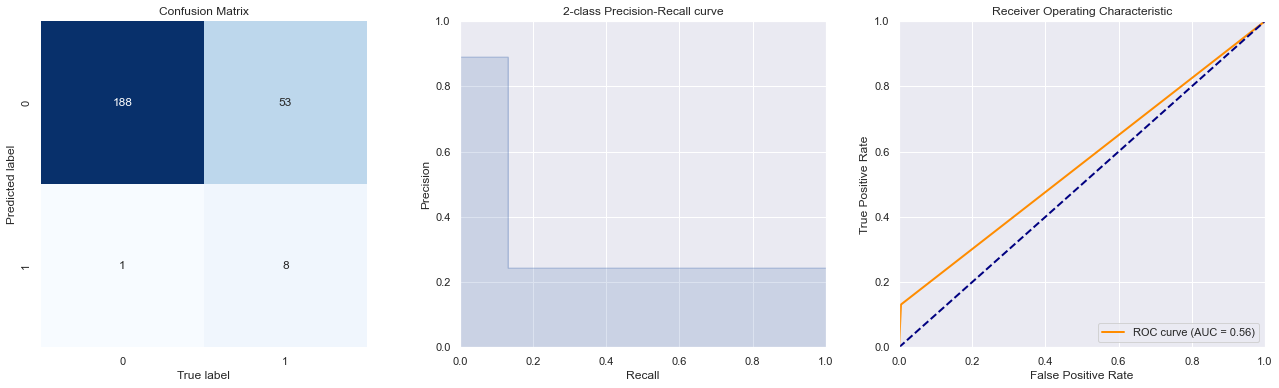

In [33]:
# Show report
show_summary_report(y_test, y_pred)

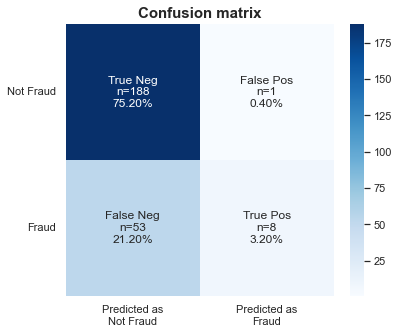

In [34]:
# Conf matrix
cf_matrix = confusion_matrix(y_test, y_pred)

#labels for the inside of heatmap
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['n={0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

#put them next line
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

#in array 2,2 cos the heatmap will be 2,2
labels = np.asarray(labels).reshape(2,2)

#class labeling
yticklabels=['Not Fraud','Fraud']
xticklabels=['Predicted as\nNot Fraud','Predicted as\nFraud']


# Set the default matplotlib figure size to 7x7:
fix, ax = plt.subplots(figsize=(6,5))

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
sns.set()
ax = sns.heatmap(cf_matrix, annot=labels, 
            xticklabels = xticklabels, yticklabels = yticklabels, 
            fmt='', cmap='Blues');

# Resize the labels.
ax.set_title('Confusion matrix', fontsize=15,  fontweight='bold')
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=11, ha= 'center', rotation=0 )
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=11, va="center", rotation=0);

### Grid search for Random Forest

In [35]:
#Set Up Grid Search
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

best_rf = CV_rfc.best_params_
best_rf

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [36]:
#Create a Random Forest Classifier
model_rff = RandomForestClassifier(max_features='sqrt', n_estimators= 500, max_depth=8, criterion='gini')

# Train the model using the training sets 
model_rff.fit(X_train, y_train)

#Show train scores
print('Training Model Score: ',model_rff.score(X_train, y_train))

#Predict Score 
y_pred = model_rff.predict(X_test)
ac_rff = accuracy_score(y_test, y_pred)
print('Accuracy is: ',ac_rff)

print(classification_report(y_test, y_pred))

Training Model Score:  0.86
Accuracy is:  0.764
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       189
           1       1.00      0.03      0.06        61

    accuracy                           0.76       250
   macro avg       0.88      0.52      0.46       250
weighted avg       0.82      0.76      0.67       250



## SVC

In [37]:
#Create a SVC model
svc_model = SVC()

# Train the model using the training sets 
svc_model.fit(X_train, y_train)
#show train scores 
print('Training Model Score: ',svc_model.score(X_train, y_train))

#Predict Score 
y_pred = svc_model.predict(X_test)
ac_svc = accuracy_score(y_test, y_pred)
print('Accuracy is: ',ac_svc)

#Classifcation Report
print(classification_report(y_test, y_pred))

Training Model Score:  0.752
Accuracy is:  0.756
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       189
           1       0.00      0.00      0.00        61

    accuracy                           0.76       250
   macro avg       0.38      0.50      0.43       250
weighted avg       0.57      0.76      0.65       250



Accuracy : 0.7560 [TP / N]         Best: 1, Worst: 0
           Proportion of predicted labels that match the true labels.
Precision: 0.0000 [TP / (TP + FP)] Best: 1, Worst: 0
           Not to label a negative sample as positive.
Recall   : 0.0000 [TP / (TP + FN)] Best: 1, Worst: 0
           Find all the positive samples.
ROC AUC  : 0.5000                  Best: 1, Worst: < 0.5
--------------------------------------------------------------------------------
TP: True Positives, FP: False Positives,
TN: True Negatives, FN: False Negatives,
N: Number of samples


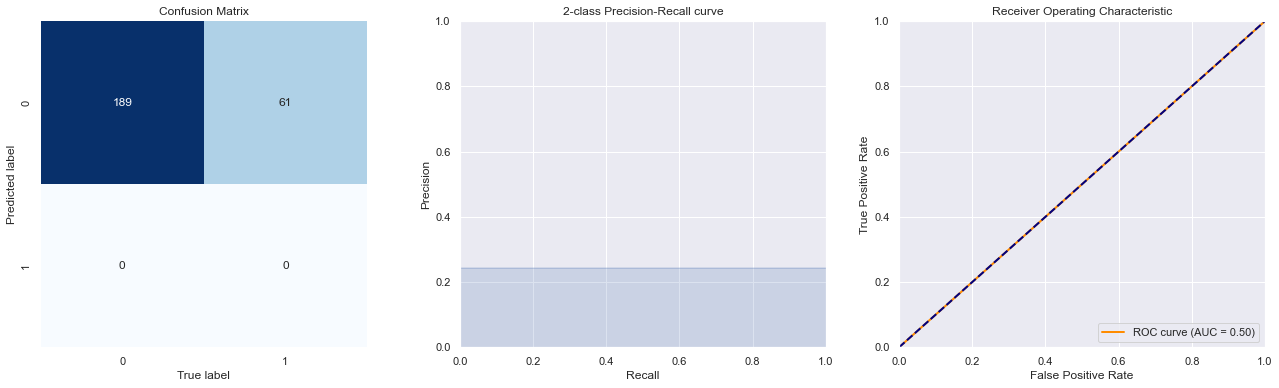

In [38]:
# Show Report
show_summary_report(y_test, y_pred)

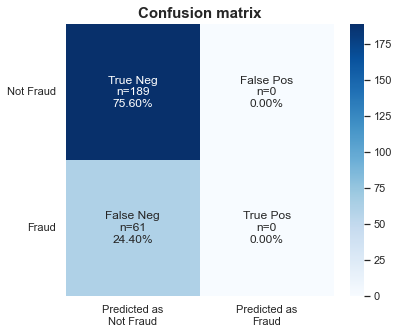

In [39]:
# Conf matrix
cf_matrix = confusion_matrix(y_test, y_pred)

#labels for the inside of heatmap
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['n={0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

#put them next line
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

#in array 2,2 cos the heatmap will be 2,2
labels = np.asarray(labels).reshape(2,2)

#class labeling
yticklabels=['Not Fraud','Fraud']
xticklabels=['Predicted as\nNot Fraud','Predicted as\nFraud']


# Set the default matplotlib figure size to 7x7:
fix, ax = plt.subplots(figsize=(6,5))

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
sns.set()
ax = sns.heatmap(cf_matrix, annot=labels, 
            xticklabels = xticklabels, yticklabels = yticklabels, 
            fmt='', cmap='Blues');

# Resize the labels.
ax.set_title('Confusion matrix', fontsize=15,  fontweight='bold')
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=11, ha= 'center', rotation=0 )
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=11, va="center", rotation=0);

 - Remove Markdown if needing to re-run 
 - takes a while to run 

### SVM gridsearch 
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

print(grid.best_estimator_)

#Create a SVC model
svc_modelf = SVC(C=1, gamma=1, kernel='linear')

# Train the model using the training sets 
svc_modelf.fit(X_train, y_train)
svc_modelf.score(X_test, y_test)

y_pred = svc_modelf.predict(X_test)
ac_svcf = accuracy_score(y_test, y_pred)
print('Accuracy is: ',ac_svcf)

print(classification_report(y_test, y_pred))

# Show Report
show_summary_report(y_test, y_pred)

# Conf matrix
cf_matrix = confusion_matrix(y_test, y_pred)

#labels for the inside of heatmap
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['n={0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

#put them next line
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

#in array 2,2 cos the heatmap will be 2,2
labels = np.asarray(labels).reshape(2,2)

#class labeling
yticklabels=['Not Fraud','Fraud']
xticklabels=['Predicted as\nNot Fraud','Predicted as\nFraud']


# Set the default matplotlib figure size to 7x7:
fix, ax = plt.subplots(figsize=(6,5))

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
sns.set()
ax = sns.heatmap(cf_matrix, annot=labels, 
            xticklabels = xticklabels, yticklabels = yticklabels, 
            fmt='', cmap='Blues');

# Resize the labels.
ax.set_title('Confusion matrix', fontsize=15,  fontweight='bold')
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=11, ha= 'center', rotation=0 )
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=11, va="center", rotation=0);

## XGBoost

In [40]:
#Apply model
xgb_model = XGBClassifier()
#Train model
xgb_model.fit(X_train, y_train)
#show train scores 
print('Training Model Score: ',xgb_model.score(X_train, y_train))

#Test the model 
y_pred = xgb_model.predict(X_test)
ac_xgb = accuracy_score(y_test, y_pred)
print(xgb_model.score(X_train, y_train))
print('Accuracy is: ',ac_xgb)

#show model report
print(classification_report(y_test, y_pred))

Training Model Score:  1.0
1.0
Accuracy is:  0.832
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       189
           1       0.73      0.49      0.59        61

    accuracy                           0.83       250
   macro avg       0.79      0.72      0.74       250
weighted avg       0.82      0.83      0.82       250



Accuracy : 0.8320 [TP / N]         Best: 1, Worst: 0
           Proportion of predicted labels that match the true labels.
Precision: 0.7317 [TP / (TP + FP)] Best: 1, Worst: 0
           Not to label a negative sample as positive.
Recall   : 0.4918 [TP / (TP + FN)] Best: 1, Worst: 0
           Find all the positive samples.
ROC AUC  : 0.7168                  Best: 1, Worst: < 0.5
--------------------------------------------------------------------------------
TP: True Positives, FP: False Positives,
TN: True Negatives, FN: False Negatives,
N: Number of samples


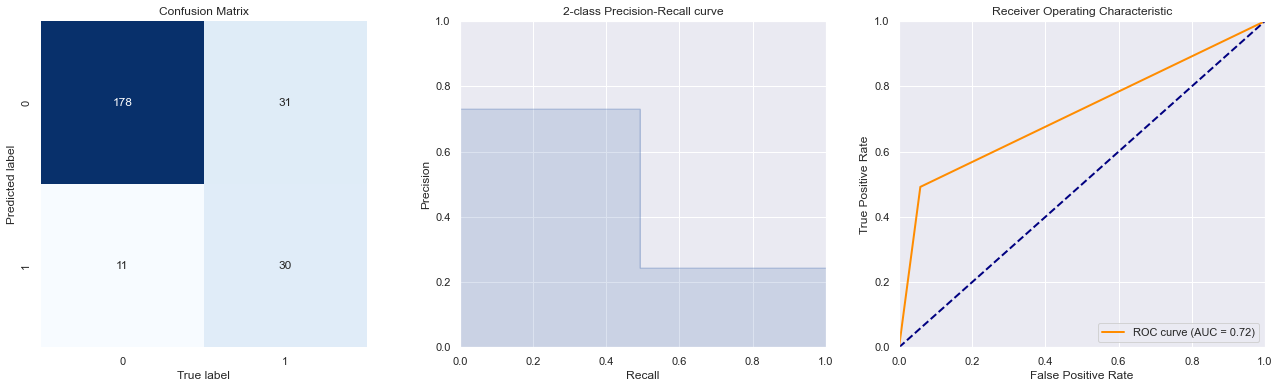

In [41]:
#show report
show_summary_report(y_test, y_pred)

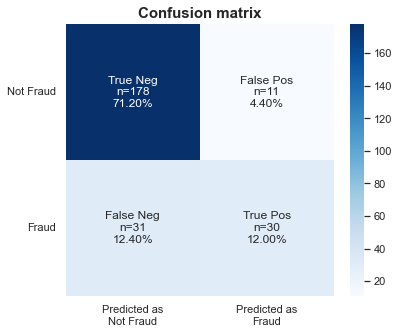

In [42]:
# Conf matrix
cf_matrix = confusion_matrix(y_test, y_pred)

#labels for the inside of heatmap
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['n={0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

#put them next line
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

#in array 2,2 cos the heatmap will be 2,2
labels = np.asarray(labels).reshape(2,2)

#class labeling
yticklabels=['Not Fraud','Fraud']
xticklabels=['Predicted as\nNot Fraud','Predicted as\nFraud']


# Set the default matplotlib figure size to 7x7:
fix, ax = plt.subplots(figsize=(6,5))

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
sns.set()
ax = sns.heatmap(cf_matrix, annot=labels, 
            xticklabels = xticklabels, yticklabels = yticklabels, 
            fmt='', cmap='Blues');

# Resize the labels.
ax.set_title('Confusion matrix', fontsize=15,  fontweight='bold')
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=11, ha= 'center', rotation=0 )
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=11, va="center", rotation=0);

In [43]:
### xgboost Grid search 
parameters = {'nthread':[4], 
              'objective':['binary:logistic'],
              'learning_rate': [0.05],
              'max_depth': [6],
              'min_child_weight': [11],
              
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [1000], 
              'missing':[-999],
              'seed': [1337]}


clf = GridSearchCV(xgb_model, parameters, n_jobs=5, 
                   cv=5, 
                   scoring= None,
                   verbose=2, refit=True)

clf.fit(X_train, y_train)

best_x = clf.best_estimator_
best_x

Fitting 5 folds for each of 1 candidates, totalling 5 fits


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=11,
              missing=-999, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, nthread=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, ...)

In [44]:
#Apply Grid search model 
xgb_modelf = XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                           reg_lambda= 0.05, reg_alpha= 0.5, n_estimators= 350, max_depth= 5, gamma= 0, eta= 0.05)
#Train the model
xgb_modelf.fit(X_train, y_train)
#show model score
print('Training Model Score: ',xgb_modelf.score(X_train, y_train))

#Test the model 
y_pred = xgb_modelf.predict(X_test)
ac_xgbf = accuracy_score(y_test, y_pred)
print('Accuracy is: ',ac_xgbf)

#Show Report
print(classification_report(y_test, y_pred))

Training Model Score:  1.0
Accuracy is:  0.836
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       189
           1       0.73      0.52      0.61        61

    accuracy                           0.84       250
   macro avg       0.79      0.73      0.75       250
weighted avg       0.83      0.84      0.83       250



### NN Classifer 

Training Model Score:  0.704
Accuracy is:  0.676
              precision    recall  f1-score   support

           0       0.75      0.87      0.80       189
           1       0.17      0.08      0.11        61

    accuracy                           0.68       250
   macro avg       0.46      0.47      0.46       250
weighted avg       0.60      0.68      0.63       250



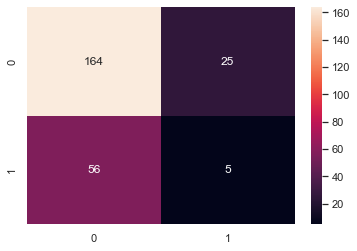

In [45]:
#Apply Model
mlp_model = MLPClassifier()
#Train Model 
mlp_model.fit(X_train, y_train)
#Train Score 
print('Training Model Score: ',mlp_model.score(X_train, y_train))

y_pred = mlp_model.predict(X_test)
ac_mlp = accuracy_score(y_test, y_pred)
print('Accuracy is: ',ac_mlp)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d");
print(classification_report(y_test, y_pred))

In [46]:
mlp_gs = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
clf.fit(X, y)


best_x = clf.best_estimator_
best_x

[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=11, missing=-999, n_estimators=1000, nthread=4, objective=binary:logistic, seed=1337, subsample=0.8; total time=   6.9s


/Users/Neil/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Neil/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Neil/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Neil/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:111

/Users/Neil/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Neil/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Neil/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Neil/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed 

/Users/Neil/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Neil/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Neil/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Neil/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:111

/Users/Neil/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Neil/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Neil/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Neil/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:111

/Users/Neil/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Neil/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Neil/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Neil/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:111

/Users/Neil/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Neil/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Neil/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Neil/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:111

MLPClassifier(activation='tanh', alpha=0.05, hidden_layer_sizes=(20,),
              learning_rate='adaptive', max_iter=100, solver='sgd')

Accuracy is:  0.756
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       189
           1       0.00      0.00      0.00        61

    accuracy                           0.76       250
   macro avg       0.38      0.50      0.43       250
weighted avg       0.57      0.76      0.65       250



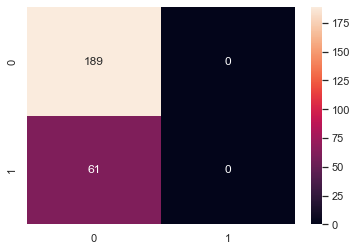

In [47]:
mlp_modelf = MLPClassifier(activation='tanh', hidden_layer_sizes=(10, 30, 10), max_iter=100,
              solver='sgd')
#MLPClassifier(activation='tanh', alpha=0.05, hidden_layer_sizes=(10, 30, 10),learning_rate='adaptive', max_iter=100)
mlp_modelf.fit(X_train, y_train)
mlp_modelf.score(X_test, y_test)

y_pred = mlp_modelf.predict(X_test)
ac_mlpf = accuracy_score(y_test, y_pred)
print('Accuracy is: ',ac_mlpf)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d");
print(classification_report(y_test, y_pred))

## Stacking 

In [48]:
#Stacking Model PipeLine 
sclf = StackingClassifier(
    classifiers = [lin_modelf, model_rf,xgb_model],
    meta_classifier = lin_model)
sclf.fit(X_train, y_train)

print('Training Model Score: ',sclf.score(X_train, y_train))

#test model
y_pred = sclf.predict(X_test)
ac_sclf = accuracy_score(y_test, y_pred)
print('Accuracy is: ',ac_sclf)

#Print Model 
print(classification_report(y_test, y_pred))

Training Model Score:  1.0
Accuracy is:  0.82
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       189
           1       0.75      0.39      0.52        61

    accuracy                           0.82       250
   macro avg       0.79      0.68      0.70       250
weighted avg       0.81      0.82      0.80       250



Accuracy : 0.8200 [TP / N]         Best: 1, Worst: 0
           Proportion of predicted labels that match the true labels.
Precision: 0.7500 [TP / (TP + FP)] Best: 1, Worst: 0
           Not to label a negative sample as positive.
Recall   : 0.3934 [TP / (TP + FN)] Best: 1, Worst: 0
           Find all the positive samples.
ROC AUC  : 0.6756                  Best: 1, Worst: < 0.5
--------------------------------------------------------------------------------
TP: True Positives, FP: False Positives,
TN: True Negatives, FN: False Negatives,
N: Number of samples


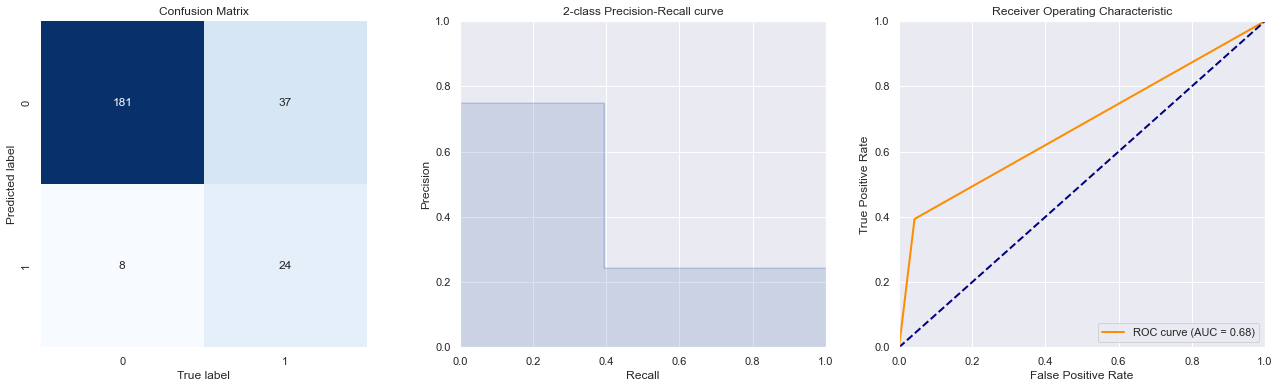

In [49]:
#Show report 
show_summary_report(y_test, y_pred)

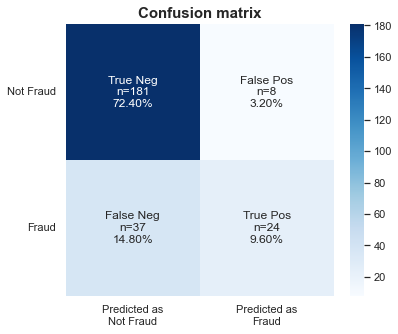

In [50]:
# Conf matrix
cf_matrix = confusion_matrix(y_test, y_pred)

#labels for the inside of heatmap
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['n={0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

#put them next line
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

#in array 2,2 cos the heatmap will be 2,2
labels = np.asarray(labels).reshape(2,2)

#class labeling
yticklabels=['Not Fraud','Fraud']
xticklabels=['Predicted as\nNot Fraud','Predicted as\nFraud']


# Set the default matplotlib figure size to 7x7:
fix, ax = plt.subplots(figsize=(6,5))

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
sns.set()
ax = sns.heatmap(cf_matrix, annot=labels, 
            xticklabels = xticklabels, yticklabels = yticklabels, 
            fmt='', cmap='Blues');

# Resize the labels.
ax.set_title('Confusion matrix', fontsize=15,  fontweight='bold')
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=11, ha= 'center', rotation=0 )
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=11, va="center", rotation=0);

### Model Comparison Example

In [51]:
#Gather Best Scores 
models = pd.DataFrame({
    'Model' : ['Log', 'XGBoost','Stacking','Decision Tree', "Random Forest" , 'SVC', 'Baseline',  'KNN'],
    'Score' : [ac_logf, ac_xgb, ac_sclf,ac_dt,ac_rf ,ac_svc, ac_dlog , ac_knn ]
})


#Print Highest to lowest 
Models = models.sort_values(by = 'Score', ascending = False)
Models

Model  Score
0            Log  0.844
1        XGBoost  0.832
2       Stacking  0.820
3  Decision Tree  0.808
4  Random Forest  0.784
5            SVC  0.756
6       Baseline  0.753
7            KNN  0.712

In [52]:
#Display results


fig = px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', 
       title = 'Who Performed The Best?' , labels = {"Score" : 'Test Score','Model':' '  })

fig.show()

## Feature Importance

In [53]:
#Feature importance 
print(xgb_modelf.feature_importances_)

[0.00976733 0.01124595 0.00724822 0.01148765 0.00988944 0.00795367
 0.00995728 0.00900662 0.00692598 0.01039048 0.00879053 0.00938347
 0.03187328 0.00804124 0.00621439 0.00402497 0.01483149 0.00971973
 0.00987669 0.01223528 0.01248177 0.00931086 0.01502355 0.01409409
 0.01282915 0.         0.01224308 0.0092515  0.01700803 0.
 0.         0.00828945 0.00234826 0.         0.         0.
 0.         0.01068321 0.01296895 0.04931432 0.0470998  0.01611608
 0.         0.00580135 0.02385251 0.01306109 0.00370801 0.00579501
 0.         0.01268324 0.03036978 0.00847539 0.02495882 0.0114396
 0.00709391 0.01399821 0.01763566 0.00850067 0.0099563  0.01623575
 0.00681834 0.         0.01358289 0.00657428 0.04904368 0.08185501
 0.00496795 0.01309568 0.         0.00683691 0.00665477 0.00659349
 0.01239685 0.         0.         0.01516786 0.         0.01701067
 0.         0.         0.         0.         0.0149285  0.
 0.00368799 0.         0.         0.         0.         0.01280527
 0.         0.      

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Num of times feature used to split data across all trees', ylabel='Features'>

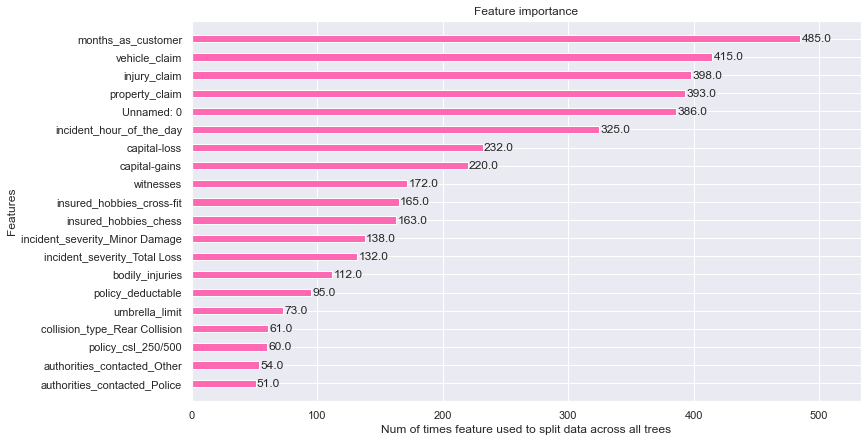

In [54]:
#visualise 
fig, ax = plt.subplots(figsize=(12, 7))
plot_importance(xgb_modelf, importance_type='weight', 
                max_num_features=20, height=0.4, ax=ax, xlabel='Num of times feature used to split data across all trees',
               color='hotpink')

## SMOTE 
- oversample to see if there is an improvment in the imbalanced data 

In [55]:
#Apply Smote to the data 
oversample = SMOTE()
S_train, m_train = oversample.fit_resample(X_train, y_train)
print(m_train.value_counts())

Y
0    564
1    564
dtype: int64


## Base Line for SMOTE 

Accuracy is:  0.756
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       189
           1       0.00      0.00      0.00        61

    accuracy                           0.76       250
   macro avg       0.38      0.50      0.43       250
weighted avg       0.57      0.76      0.65       250

Accuracy : 0.7560 [TP / N]         Best: 1, Worst: 0
           Proportion of predicted labels that match the true labels.
Precision: 0.0000 [TP / (TP + FP)] Best: 1, Worst: 0
           Not to label a negative sample as positive.
Recall   : 0.0000 [TP / (TP + FN)] Best: 1, Worst: 0
           Find all the positive samples.
ROC AUC  : 0.5000                  Best: 1, Worst: < 0.5
--------------------------------------------------------------------------------
TP: True Positives, FP: False Positives,
TN: True Negatives, FN: False Negatives,
N: Number of samples


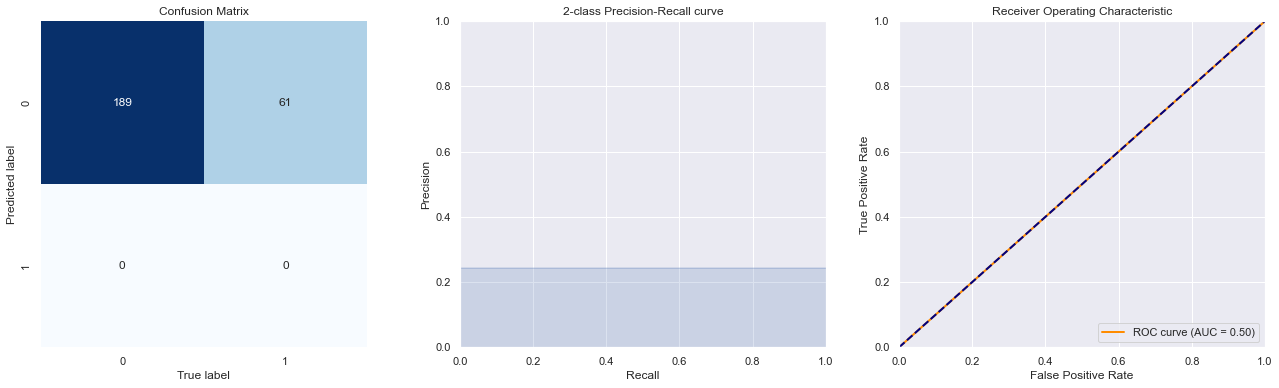

In [56]:
#Apply Dummy Classifier
dum_model = DummyClassifier(strategy="most_frequent")
dum_model.fit(S_train, m_train)

y_pred = dum_model.predict(X_test)
sc_dlog = accuracy_score(y_test,y_pred)
print('Accuracy is: ',sc_dlog)

print(classification_report(y_test, y_pred))

show_summary_report(y_test, y_pred)

## Logistic Regression 

In [57]:
#Logistic Regression apply model
lin_model = LogisticRegression()

# Train model 
lin_model.fit(S_train, m_train)
#Print Training Score 
print('Training Model Score: ',lin_model.score(S_train, m_train))

# Test The Model
y_pred = lin_model.predict(X_test)
ac_log = accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac_log)

# Print Report
print(classification_report(y_test, y_pred))

Training Model Score:  0.5877659574468085
Accuracy is:  0.532
              precision    recall  f1-score   support

           0       0.79      0.52      0.63       189
           1       0.27      0.56      0.37        61

    accuracy                           0.53       250
   macro avg       0.53      0.54      0.50       250
weighted avg       0.66      0.53      0.56       250



Accuracy : 0.5320 [TP / N]         Best: 1, Worst: 0
           Proportion of predicted labels that match the true labels.
Precision: 0.2742 [TP / (TP + FP)] Best: 1, Worst: 0
           Not to label a negative sample as positive.
Recall   : 0.5574 [TP / (TP + FN)] Best: 1, Worst: 0
           Find all the positive samples.
ROC AUC  : 0.5406                  Best: 1, Worst: < 0.5
--------------------------------------------------------------------------------
TP: True Positives, FP: False Positives,
TN: True Negatives, FN: False Negatives,
N: Number of samples


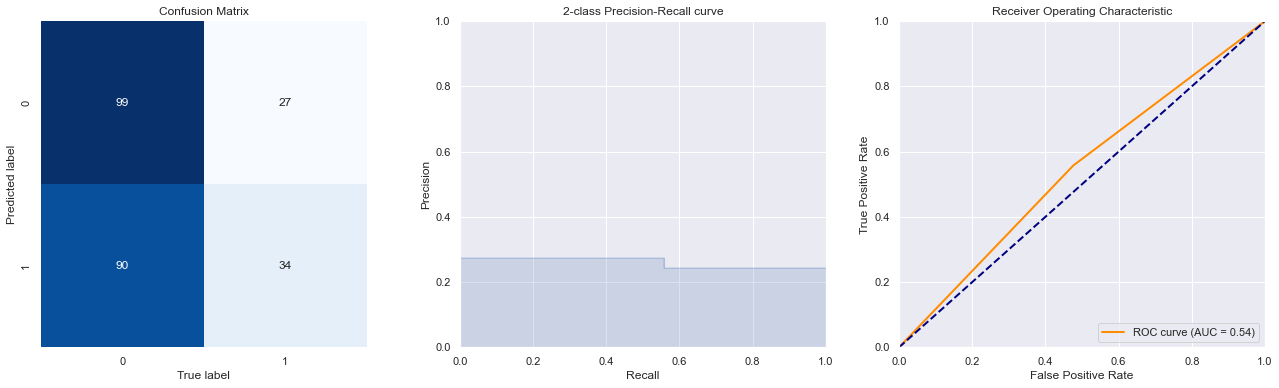

In [58]:
show_summary_report(y_test, y_pred)

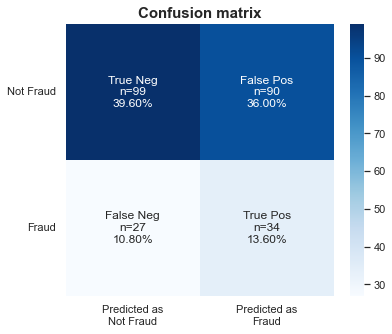

In [59]:
# Conf matrix
cf_matrix = confusion_matrix(y_test, y_pred)

#labels for the inside of heatmap
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['n={0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

#put them next line
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

#in array 2,2 cos the heatmap will be 2,2
labels = np.asarray(labels).reshape(2,2)

#class labeling
yticklabels=['Not Fraud','Fraud']
xticklabels=['Predicted as\nNot Fraud','Predicted as\nFraud']


# Set the default matplotlib figure size to 7x7:
fix, ax = plt.subplots(figsize=(6,5))

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
sns.set()
ax = sns.heatmap(cf_matrix, annot=labels, 
            xticklabels = xticklabels, yticklabels = yticklabels, 
            fmt='', cmap='Blues');

# Resize the labels.
ax.set_title('Confusion matrix', fontsize=15,  fontweight='bold')
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=11, ha= 'center', rotation=0 )
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=11, va="center", rotation=0);

In [60]:
#prepare grid search
clf = LogisticRegression()
grid_values = {'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],'penalty': ['l1', 'l2','elasticnet','none'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'recall')
grid_clf_acc.fit(S_train, m_train)
log_b = grid_clf_acc.best_estimator_
log_b

LogisticRegression(C=0.09, penalty='l1', solver='liblinear')

In [61]:
#Grid Search for Logistic Regression
lin_modelf = LogisticRegression(C=0.09,penalty='l1', solver='liblinear')
#Train model
lin_modelf.fit(S_train, m_train)
#Print Training Score
print('Training Model Score: ',lin_modelf.score(S_train, m_train))

y_pred = lin_modelf.predict(X_test)
sc_logf = accuracy_score(y_test,y_pred)
print('Accuracy is: ',sc_logf)

print(classification_report(y_test, y_pred))

Training Model Score:  0.8608156028368794
Accuracy is:  0.816
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       189
           1       0.61      0.69      0.65        61

    accuracy                           0.82       250
   macro avg       0.75      0.77      0.76       250
weighted avg       0.83      0.82      0.82       250



Accuracy : 0.8160 [TP / N]         Best: 1, Worst: 0
           Proportion of predicted labels that match the true labels.
Precision: 0.6087 [TP / (TP + FP)] Best: 1, Worst: 0
           Not to label a negative sample as positive.
Recall   : 0.6885 [TP / (TP + FN)] Best: 1, Worst: 0
           Find all the positive samples.
ROC AUC  : 0.7728                  Best: 1, Worst: < 0.5
--------------------------------------------------------------------------------
TP: True Positives, FP: False Positives,
TN: True Negatives, FN: False Negatives,
N: Number of samples


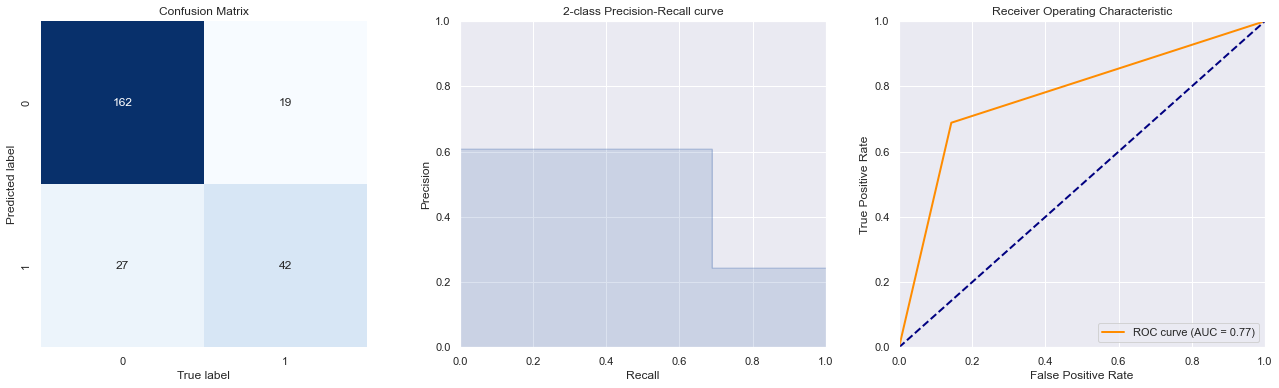

In [62]:
show_summary_report(y_test, y_pred)

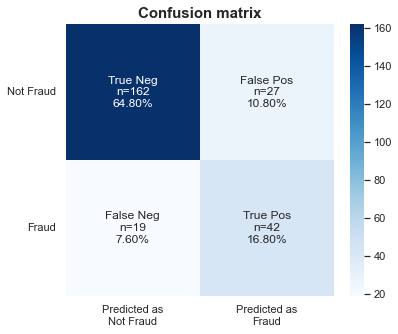

In [63]:
# Conf matrix
cf_matrix = confusion_matrix(y_test, y_pred)

#labels for the inside of heatmap
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['n={0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

#put them next line
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

#in array 2,2 cos the heatmap will be 2,2
labels = np.asarray(labels).reshape(2,2)

#class labeling
yticklabels=['Not Fraud','Fraud']
xticklabels=['Predicted as\nNot Fraud','Predicted as\nFraud']


# Set the default matplotlib figure size to 7x7:
fix, ax = plt.subplots(figsize=(6,5))

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
sns.set()
ax = sns.heatmap(cf_matrix, annot=labels, 
            xticklabels = xticklabels, yticklabels = yticklabels, 
            fmt='', cmap='Blues');

# Resize the labels.
ax.set_title('Confusion matrix', fontsize=15,  fontweight='bold')
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=11, ha= 'center', rotation=0 )
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=11, va="center", rotation=0);

## XG Boost 

In [64]:
#Apply model
xgb_model = XGBClassifier()
#Train model
xgb_model.fit(S_train, m_train)
#show train scores 
print('Training Model Score: ',xgb_model.score(S_train, m_train))

#Test the model 
y_pred = xgb_model.predict(X_test)
sc_xgb = accuracy_score(y_test, y_pred)

print('Accuracy is: ',sc_xgb)

#show model report
print(classification_report(y_test, y_pred))

Training Model Score:  1.0
Accuracy is:  0.832
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       189
           1       0.67      0.61      0.64        61

    accuracy                           0.83       250
   macro avg       0.77      0.76      0.76       250
weighted avg       0.83      0.83      0.83       250



Accuracy : 0.8320 [TP / N]         Best: 1, Worst: 0
           Proportion of predicted labels that match the true labels.
Precision: 0.6727 [TP / (TP + FP)] Best: 1, Worst: 0
           Not to label a negative sample as positive.
Recall   : 0.6066 [TP / (TP + FN)] Best: 1, Worst: 0
           Find all the positive samples.
ROC AUC  : 0.7557                  Best: 1, Worst: < 0.5
--------------------------------------------------------------------------------
TP: True Positives, FP: False Positives,
TN: True Negatives, FN: False Negatives,
N: Number of samples


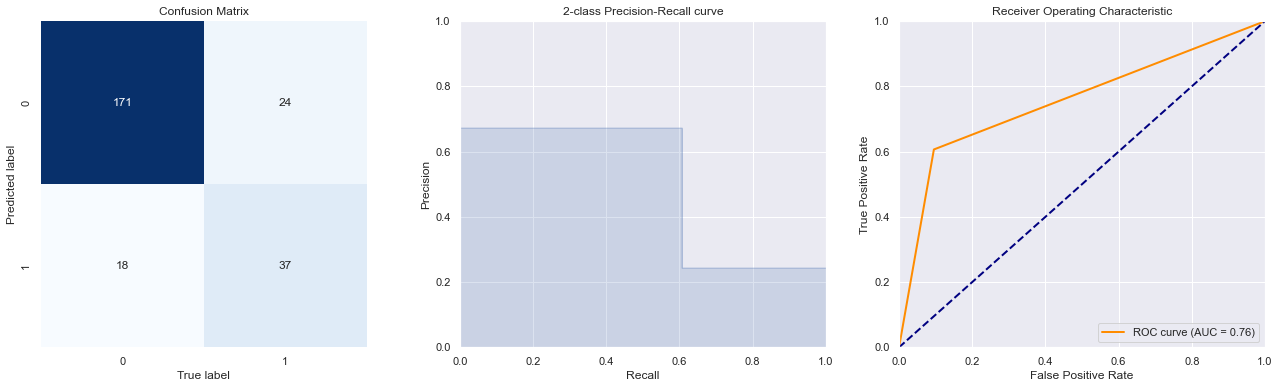

In [65]:
#Show Report
show_summary_report(y_test, y_pred)

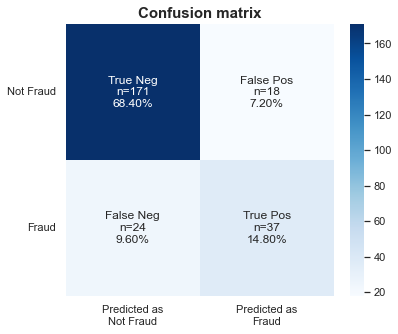

In [66]:
# Conf matrix
cf_matrix = confusion_matrix(y_test, y_pred)

#labels for the inside of heatmap
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['n={0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

#put them next line
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

#in array 2,2 cos the heatmap will be 2,2
labels = np.asarray(labels).reshape(2,2)

#class labeling
yticklabels=['Not Fraud','Fraud']
xticklabels=['Predicted as\nNot Fraud','Predicted as\nFraud']


# Set the default matplotlib figure size to 7x7:
fix, ax = plt.subplots(figsize=(6,5))

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
sns.set()
ax = sns.heatmap(cf_matrix, annot=labels, 
            xticklabels = xticklabels, yticklabels = yticklabels, 
            fmt='', cmap='Blues');

# Resize the labels.
ax.set_title('Confusion matrix', fontsize=15,  fontweight='bold')
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=11, ha= 'center', rotation=0 )
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=11, va="center", rotation=0);

In [67]:
### xgboost Grid search 
parameters = {'nthread':[4], 
              'objective':['binary:logistic'],
              'learning_rate': [0.05],
              'max_depth': [6],
              'min_child_weight': [11],
              
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [1000], 
              'missing':[-999],
              'seed': [1337]}



clf = GridSearchCV(xgb_model, parameters, n_jobs=5, 
                   cv=5, 
                   scoring= None,
                   verbose=2, refit=True)

clf.fit(S_train, m_train)

best_x = clf.best_estimator_
best_x

Fitting 5 folds for each of 1 candidates, totalling 5 fits


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=11,
              missing=-999, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, nthread=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, ...)

In [68]:
#Apply Grid search model 
xgb_modelf = XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                           reg_lambda= 0.05, reg_alpha= 0.5, n_estimators= 350, max_depth= 5, gamma= 0, eta= 0.05)
#Train the model
xgb_modelf.fit(S_train, m_train)
#show model score
print('Training Model Score: ',xgb_modelf.score(S_train, m_train))

#Test the model 
y_pred = xgb_modelf.predict(X_test)
ac_xgbf = accuracy_score(y_test, y_pred)
print('Accuracy is: ',ac_xgbf)

#Show Report
print(classification_report(y_test, y_pred))

Training Model Score:  1.0
Accuracy is:  0.836
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       189
           1       0.69      0.59      0.64        61

    accuracy                           0.84       250
   macro avg       0.78      0.75      0.77       250
weighted avg       0.83      0.84      0.83       250



Accuracy : 0.8360 [TP / N]         Best: 1, Worst: 0
           Proportion of predicted labels that match the true labels.
Precision: 0.6923 [TP / (TP + FP)] Best: 1, Worst: 0
           Not to label a negative sample as positive.
Recall   : 0.5902 [TP / (TP + FN)] Best: 1, Worst: 0
           Find all the positive samples.
ROC AUC  : 0.7528                  Best: 1, Worst: < 0.5
--------------------------------------------------------------------------------
TP: True Positives, FP: False Positives,
TN: True Negatives, FN: False Negatives,
N: Number of samples


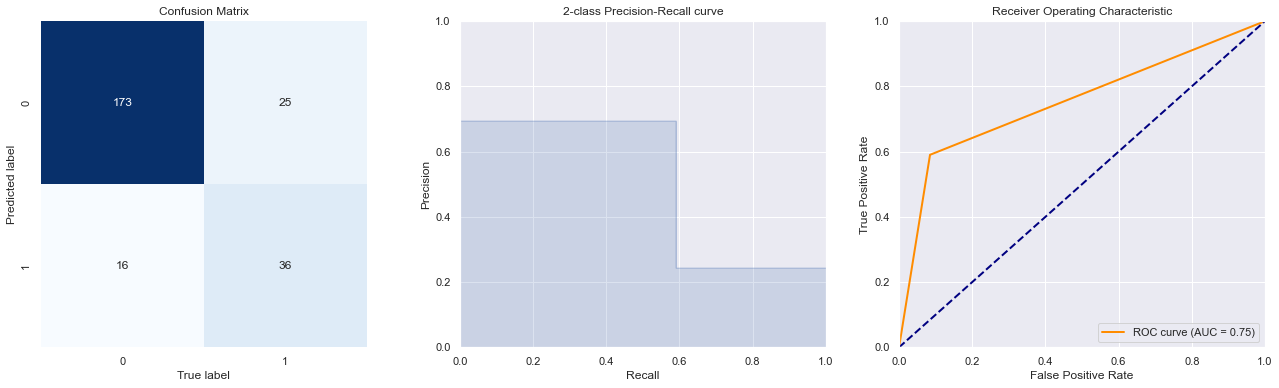

In [69]:
#Show Report
show_summary_report(y_test, y_pred)

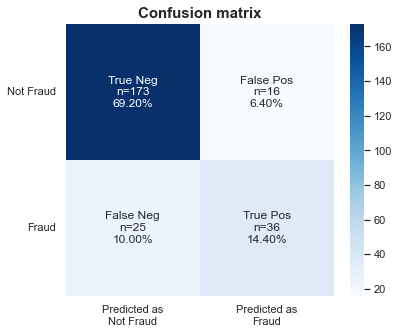

In [70]:
# Conf matrix
cf_matrix = confusion_matrix(y_test, y_pred)

#labels for the inside of heatmap
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['n={0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

#put them next line
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

#in array 2,2 cos the heatmap will be 2,2
labels = np.asarray(labels).reshape(2,2)

#class labeling
yticklabels=['Not Fraud','Fraud']
xticklabels=['Predicted as\nNot Fraud','Predicted as\nFraud']


# Set the default matplotlib figure size to 7x7:
fix, ax = plt.subplots(figsize=(6,5))

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
sns.set()
ax = sns.heatmap(cf_matrix, annot=labels, 
            xticklabels = xticklabels, yticklabels = yticklabels, 
            fmt='', cmap='Blues');

# Resize the labels.
ax.set_title('Confusion matrix', fontsize=15,  fontweight='bold')
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=11, ha= 'center', rotation=0 )
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=11, va="center", rotation=0);

## Feature Importance

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Num of times feature used to split data across all trees', ylabel='Features'>

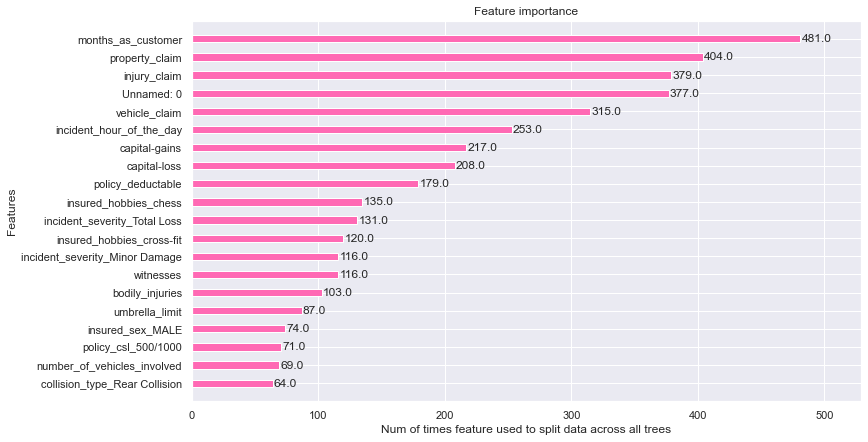

In [71]:
#visualise 
fig, ax = plt.subplots(figsize=(12, 7))
plot_importance(xgb_modelf, importance_type='weight', 
                max_num_features=20, height=0.4, ax=ax, xlabel='Num of times feature used to split data across all trees',
               color='hotpink')

## Decision Tree 

In [72]:
#Create a Decision Tree Classifier
model_dt = DecisionTreeClassifier()

# Train the model using the training sets 
model_dt.fit(S_train, m_train)
#Show Trianing Scores 
print('Training Model Score: ',model_dt.score(S_train, m_train))

#Predict Score 
y_pred = model_dt.predict(X_test)
sc_dt = accuracy_score(y_test, y_pred)
print('Accuracy is: ',sc_dt)

print(classification_report(y_test, y_pred))

Training Model Score:  1.0
Accuracy is:  0.828
              precision    recall  f1-score   support

           0       0.89      0.88      0.89       189
           1       0.64      0.67      0.66        61

    accuracy                           0.83       250
   macro avg       0.77      0.78      0.77       250
weighted avg       0.83      0.83      0.83       250



Accuracy : 0.8280 [TP / N]         Best: 1, Worst: 0
           Proportion of predicted labels that match the true labels.
Precision: 0.6406 [TP / (TP + FP)] Best: 1, Worst: 0
           Not to label a negative sample as positive.
Recall   : 0.6721 [TP / (TP + FN)] Best: 1, Worst: 0
           Find all the positive samples.
ROC AUC  : 0.7752                  Best: 1, Worst: < 0.5
--------------------------------------------------------------------------------
TP: True Positives, FP: False Positives,
TN: True Negatives, FN: False Negatives,
N: Number of samples


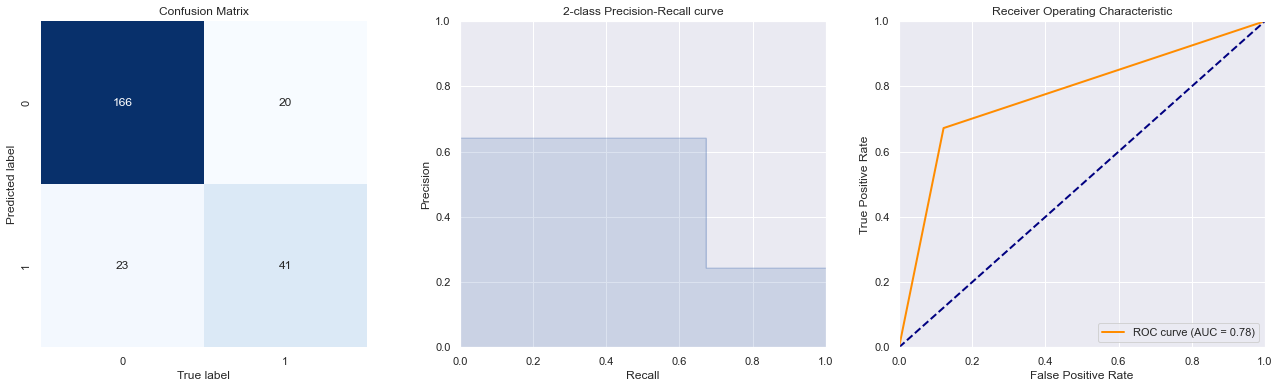

In [73]:
#Show Report
show_summary_report(y_test, y_pred)

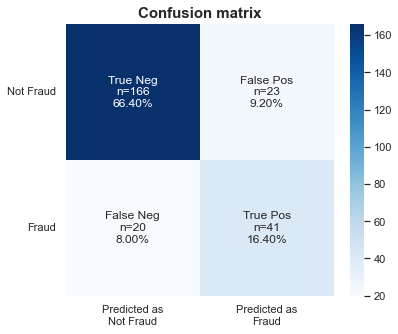

In [74]:
# Conf matrix
cf_matrix = confusion_matrix(y_test, y_pred)

#labels for the inside of heatmap
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['n={0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

#put them next line
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

#in array 2,2 cos the heatmap will be 2,2
labels = np.asarray(labels).reshape(2,2)

#class labeling
yticklabels=['Not Fraud','Fraud']
xticklabels=['Predicted as\nNot Fraud','Predicted as\nFraud']


# Set the default matplotlib figure size to 7x7:
fix, ax = plt.subplots(figsize=(6,5))

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
sns.set()
ax = sns.heatmap(cf_matrix, annot=labels, 
            xticklabels = xticklabels, yticklabels = yticklabels, 
            fmt='', cmap='Blues');

# Resize the labels.
ax.set_title('Confusion matrix', fontsize=15,  fontweight='bold')
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=11, ha= 'center', rotation=0 )
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=11, va="center", rotation=0);

In [75]:
#Set up grid search 
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : range(1,20),
              'criterion' :['gini', 'entropy']
             }

grid_search = GridSearchCV(estimator=model_dt, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(S_train, m_train)

final_model = grid_search.best_estimator_
final_model

Fitting 5 folds for each of 342 candidates, totalling 1710 fits


DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=12,
                       max_features='auto')

In [76]:
# Train the model using the training sets 
f_model = DecisionTreeClassifier(ccp_alpha=0.001, max_depth=11,
                       max_features='auto')
#Train the model 
f_model.fit(S_train, m_train)
#show training score 
print('Training Model Score: ',f_model.score(S_train, m_train))

#Predict Score 
y_pred_f = f_model.predict(X_test)
ac_dt_f = accuracy_score(y_test, y_pred_f)
print('Accuracy is: ',ac_dt_f)

print(classification_report(y_test, y_pred_f))

Training Model Score:  0.875
Accuracy is:  0.684
              precision    recall  f1-score   support

           0       0.83      0.74      0.78       189
           1       0.39      0.52      0.45        61

    accuracy                           0.68       250
   macro avg       0.61      0.63      0.61       250
weighted avg       0.72      0.68      0.70       250



## Gather Scores 

In [77]:
#Gather Best Scores 
models = pd.DataFrame({
    'Model' : ['Decision Tree', 'Log', 'XGBoost', 'Baseline'],
    'Score' : [sc_dt, sc_logf, sc_xgb,  sc_dlog]
})


#Print Highest to lowest 
models.sort_values(by = 'Score', ascending = False)

Model  Score
2        XGBoost  0.832
0  Decision Tree  0.828
1            Log  0.816
3       Baseline  0.756

In [78]:
#Display results
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', 
       title = 'Who Performed The Best?' , labels = {"Score" : 'Test Score','Model':' '  })

[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=11, missing=-999, n_estimators=1000, nthread=4, objective=binary:logistic, seed=1337, subsample=0.8; total time=   7.0s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=11, missing=-999, n_estimators=1000, nthread=4, objective=binary:logistic, seed=1337, subsample=0.8; total time=   9.4s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=11, missing=-999, n_estimators=1000, nthread=4, objective=binary:logistic, seed=1337, subsample=0.8; total time=   6.9s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=11, missing=-999, n_estimators=1000, nthread=4, objective=binary:logistic, seed=1337, subsample=0.8; total time=   9.7s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=11, missing=-999, n_estimators=1000, nthread=4, objective=binary:logistic, seed=1337, subsample=0.8; total time=   

# Wrap

After applying all the models to the test 

BEST MODEL 
The best model is the Decision Tree with SMOTE over fitting of 50/50. 
It had a test score of 84.8% accuracy [0.848] 
AUC: 0.78 
Would apply this model for the company. 

## Business Application

Can we predict which claims will be reported as fraud? 
Yes we are able to predict which claims would be reported as fraud. It isn’t the best and needs further tuning to be able to get the most out of the data. The model I would apply is SMOTE Over fitting [50/50] with decision tree to predict the companies up and coming claims. 

What trends does the data show that leads to fraud? -  Red Flags
From the EDA we have seen a few features that do have weight behind them. If we have a better look at these features. The XGBoost feature importance did also highlight the categories that we had covered too. 
We can highlight these aspects during the claims process or even the underwriting process. This could prevent fraud from even occurring. 
Can we minimize the loss made from fraud?
We should be able to minimize fraud loss if we apply this model during the claims process. If we can flag up potential fraud cases have a further look into them this would stop the claims from being paid out. 

## Business Implementation 

If a company applied this model during the initial stages when a claim was submitted, They could make the triage process more streamlined and efficient.  
They could make a ‘Quick Claim’ category where claims that aren't flagged/low risk are passed off for approval. Reducing the amount of time spent on low risk claims.
Flag up risky events like Major damage, missing police report for senior assessors to have a look into. 
This would help with distributing the claims to the appropriate people for example the high risk claims will be sent to highly experienced claims officers. 
During the underwriting process we could have a better look at hobbies like chess and CrossFit - potential deny additional customers that participate in this.

## Conclusion

We can utilise Machine Learning in multiple ways. As we can see we can detect suspicious patterns and trends that other fraudsters have already tried. 
Be able to increase efficiency and utilise the extra time on things that need to be focused on.   
This data set had some limitation as it had small sample size, statistical models become better as the sample size gets larger. 
For future studies I would like a larger sample size. I would also utilise less models and focus on the imbalance of the data set. Potentially try ADASTN and Bootstrap method.  
